## CUNY SPS, DATA 620: Web Analytics

## Project 2: Analyzing the NBA team-player network over multiple seasons

#### Group-1 :   Austin Chan, Justin Herman, Chester Poon, Deepak Mongia, Michael O'Donnell

Overview: This analysis aims to explore the network of current NBA players to answer the simple question, Which players have been teammates?
We will also explore how the relationships among the teams look like, as far as the players who moved from one team to another over the years.

To answer the above question, the dataset contains one row per NBA player per year. For example, LeBron James has 16 rows in the dataset. One for each of the 16 NBA seasons he played. Furthermore, each row has the team the player was on.

Lastly, this is a two mode network because it has two types of nodes: players and teams. 

### Part 1: Setup Network

In [1]:
# import the needed packages
import csv
import math
import networkx as net
from networkx.algorithms import bipartite as bi
import matplotlib as plot
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# open the dataset and reading it in a Pandas dataframe (as a csv)
nba_df = pd.read_csv("NBA_network.csv", sep='\s*,\s*', header=None, encoding='ascii', engine='python')

In [3]:
nba_df.iloc[:11, ]

,0,1,2,3,4
0,Blazers2018,Damian Lillard,2018,Blazers,Player
1,Blazers2018,CJ McCollum,2018,Blazers,Player
2,Blazers2018,Jusuf Nurkic,2018,Blazers,Player
3,Blazers2018,Al-Farouq Aminu,2018,Blazers,Player
4,Blazers2018,Seth Curry,2018,Blazers,Player
5,Blazers2018,Maurice Harkless,2018,Blazers,Player
6,Blazers2018,Jake Layman,2018,Blazers,Player
7,Blazers2018,Evan Turner,2018,Blazers,Player
8,Blazers2018,Zach Collins,2018,Blazers,Player
9,Blazers2018,Nik Stauskas,2018,Blazers,Player


In [4]:
# Dropping the column we don't want:
nba_df = nba_df.drop([4], axis=1)
# Renaming the columns for ease of use
nba_df = nba_df.rename({0:'team_year', 1:'player', 2:'year', 3:'team'}, axis='columns')

In [5]:
nba_df.iloc[:7, ]

,team_year,player,year,team
0,Blazers2018,Damian Lillard,2018,Blazers
1,Blazers2018,CJ McCollum,2018,Blazers
2,Blazers2018,Jusuf Nurkic,2018,Blazers
3,Blazers2018,Al-Farouq Aminu,2018,Blazers
4,Blazers2018,Seth Curry,2018,Blazers
5,Blazers2018,Maurice Harkless,2018,Blazers
6,Blazers2018,Jake Layman,2018,Blazers


In [6]:
# Counting the number of records by team - irrespective of year
nba_df.groupby(['team']).count()

,team_year,player,year
team,,,
Blazers,94,94,94
Bobcats,16,16,16
Bucks,85,85,85
Bulls,94,94,94
Cavaliers,75,75,75
Celtics,79,79,79
Clippers,80,80,80
Grizzlies,88,88,88
Hawks,103,103,103


As we see above, the only team we see have a very less count of players is Bobcats. This is justified as Charlotte Bobcats was renamed to Hornets later

In [7]:
# create the empty graph, and empty lists for the players and teams
g = net.Graph()
teams = []
players = []

In [8]:
# enter all nodes and edges into the graph
for index, row in nba_df.iterrows():
    if row['team_year'] not in teams:
        teams.append(row['team_year'])
    if row['player'] not in players:
        players.append(row['player'])
    g.add_edge(row['team_year'], row['player'], weight=1)

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


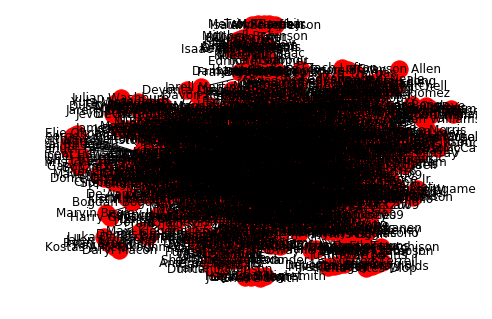

In [9]:
# draw the graph, as a giant blob
net.draw(g, with_labels=True)

The above graph does not show any information. Let us explore further.

In [10]:
# for some clarity, print the nodes in the network
print("nodes in network: ", len(g))
print("number of edges: ", g.number_of_edges())
print("======")
print("teams in network:", len(teams))
print("players in network:", len(players))

nodes in network:  827
number of edges:  2455
teams in network: 298
players in network: 529


In [11]:
bi.is_bipartite(g)

True

In [12]:
# look at components of the network
connected_net = list(net.connected_component_subgraphs(g))
print("size of largest component:", len(connected_net[0]))

size of largest component: 827


Since the largest component is equal to the number of total nodes, every player is somehow connected to every other player!

### Part 2: Create Affiliation Networks

In [13]:
# create an affiliation network of only teams
teamnet = bi.weighted_projected_graph(g, teams)

In [14]:
# create an affiliation network of only players
# this will become our main network..
playernet = bi.weighted_projected_graph(g, players)

### Part 3: Explore Centrality of Players

In [15]:
# look at degree centrality among players
deg = net.degree(playernet)
deg_list = sorted(playernet.degree, key=lambda x: x[1], reverse=True)
#print "LeBron James' degree:", deg['LeBron James']
print("top 10 highest degree:")
deg_list[0:9]
#print "ok, this list looks like players that have stayed in NBA but bounced around.."

top 10 highest degree:


[('Anthony Tolliver', 76),
 ('Michael Beasley', 69),
 ('Jerryd Bayless', 68),
 ('Omri Casspi', 67),
 ('Marco Belinelli', 67),
 ('Jeremy Lin', 64),
 ('Corey Brewer', 64),
 ('Quincy Acy', 64),
 ('Lance Stephenson', 63)]

In [16]:
# look at closeness centrality of players
import operator
closeness_cen = net.closeness_centrality(playernet)
closeness_list = sorted(closeness_cen.items(), key=operator.itemgetter(1))
#print "LeBron James' closeness:", closeness_cen['LeBron James']
print("top 10 highest closeness:")
closeness_list[520:529]

top 10 highest closeness:


[('Jerryd Bayless', 0.5038167938931297),
 ('Zaza Pachulia', 0.504297994269341),
 ('Michael Beasley', 0.5047801147227533),
 ('Jeremy Lin', 0.5057471264367817),
 ('Marco Belinelli', 0.5057471264367817),
 ('Kosta Koufos', 0.5067178502879078),
 ('Jeff Green', 0.5076923076923077),
 ('Jose Calderon', 0.5141187925998053),
 ('Anthony Tolliver', 0.5274725274725275)]

In [17]:
# look at betweenness centrality of players
betweenness_cen = net.betweenness_centrality(playernet)
betweenness_list = sorted(betweenness_cen.items(), key=operator.itemgetter(1))
#print "LeBron James' betweenness:", betweenness_cen['LeBron James']
print("top 10 highest betweenness:")
betweenness_list[520:529]

top 10 highest betweenness:


[('Nick Young', 0.012476725270877563),
 ('Lance Stephenson', 0.012795678748128553),
 ('Corey Brewer', 0.013005003600704298),
 ('Marco Belinelli', 0.013344896469167866),
 ('Shelvin Mack', 0.013664354126294583),
 ('Jerryd Bayless', 0.01551351456282852),
 ('Michael Beasley', 0.015785183087930834),
 ('Anthony Tolliver', 0.01633441018532702),
 ('Isaiah Thomas', 0.018071047650223493)]

### Part 4: Implement the Island Method

In [18]:
# now, to see the players with the highest degree (start of the island method..)
print("degree, number of players")
deg_tests = [30, 40, 50, 60, 70, 80]
num_players = 0
for i in deg_tests:    
    for j in players:
        if deg(j)>i:
            num_players = num_players + 1
    print(i, num_players)
    num_players = 0

degree, number of players
30 253
40 135
50 55
60 14
70 1
80 0


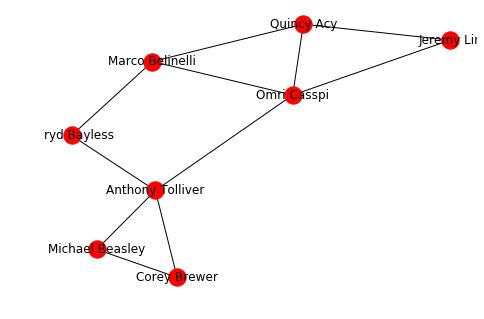

In [19]:
# let's look at only the players with 47+ degree
playernet64 = playernet.copy()
for i in players:
    if deg(i)<64:
        playernet64.remove_node(i)
net.draw(playernet64, with_labels=True)

In [20]:
deg_list = sorted(playernet64.degree, key=lambda x: x[1], reverse=True)
deg_list[0:9]

[('Omri Casspi', 4),
 ('Anthony Tolliver', 4),
 ('Marco Belinelli', 3),
 ('Quincy Acy', 3),
 ('Jeremy Lin', 2),
 ('Michael Beasley', 2),
 ('Corey Brewer', 2),
 ('Jerryd Bayless', 2)]

### Part 5: Looking at the Network of Current All Stars

In [21]:
all_stars = ['James Harden',
             'Kevin Durant',
             'Kyrie Irving',
             'Kawhi Leonard',
             'LeBron James',
             'Anthony Davis',
             'Ben Simmons',
             'Bradley Beal',
             'Damian Lillard',
             'Dwayne Wade',
             'Karl-Anthony Towns',
             'Klay Thompson',
             'LaMarcus Aldridge',
             'Giannis Antetokounmpo',
             'Stephen Curry',
             'Joel Embiid',
             'Paul George',
             'Kemba Walker',
             'Blake Griffin',
             'DAngelo Russell',
             'Dirk Nowitzki',
             'Khris Middleton',
             'Kyle Lowry',
             'Nikola Jokic',
             'Nikola Vucevic',
             'Victor Oladipo',
             'Russell Westbrook']

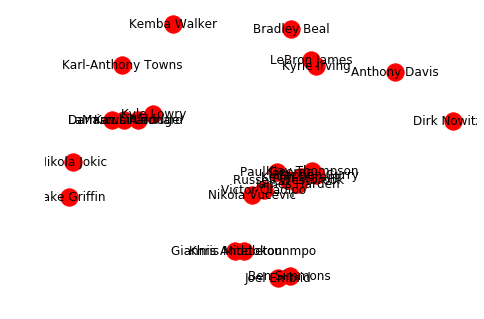

In [22]:
all_star_network = playernet.copy()
for i in players:
    if i not in all_stars:
        all_star_network.remove_node(i)
net.draw(all_star_network, with_labels=True)

In [23]:
deg_list = sorted(all_star_network.degree, key=lambda x: x[1], reverse=True)
deg_list[0:4]

[('Russell Westbrook', 4),
 ('Kevin Durant', 4),
 ('Victor Oladipo', 2),
 ('Kawhi Leonard', 2)]

In [24]:
# look at components of the network
connected_net = list(net.connected_component_subgraphs(all_star_network))
print("size of largest all star component:", len(connected_net[0]))

size of largest all star component: 4


### Exploring the Team networks

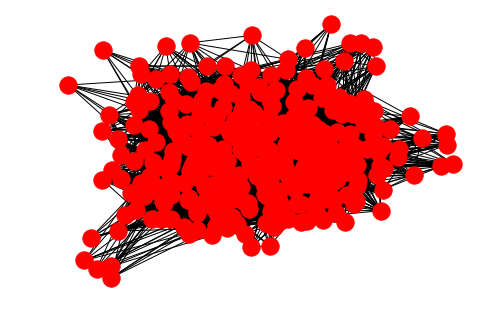

In [25]:
net.draw(teamnet)

In [26]:
teamnet.number_of_edges()

4860

In [27]:
team_weights = [edata['weight'] for f, t, edata in teamnet.edges(data=True)]

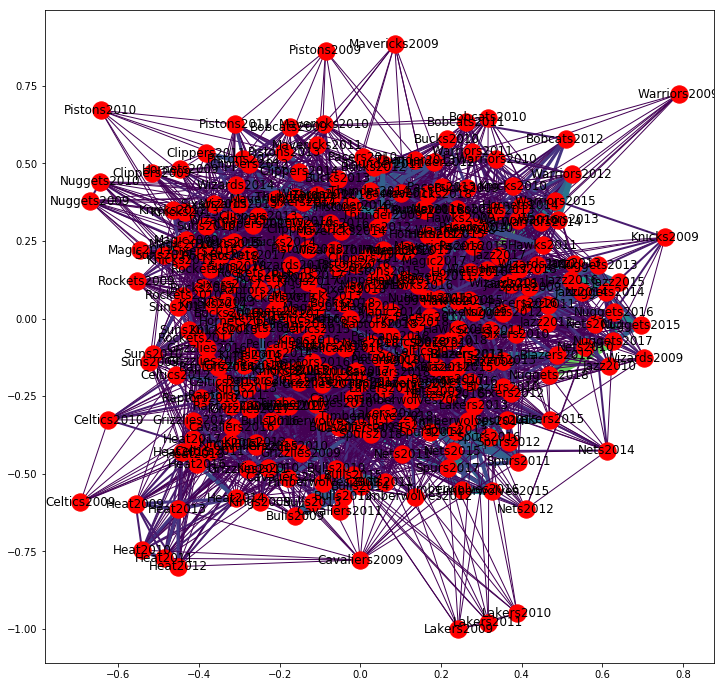

In [28]:
plt.figure(figsize=(12,12))
net.draw_networkx(teamnet, width=team_weights, edge_color=team_weights)

Let us see which team/season combinations have the highest common number of players:

In [29]:
sorted(teamnet.edges(data=True),key= lambda x: x[2]['weight'],reverse=True)[:21]

[('Jazz2018', 'Jazz2017', {'weight': 14}),
 ('Celtics2018', 'Celtics2017', {'weight': 12}),
 ('Heat2018', 'Heat2017', {'weight': 12}),
 ('Blazers2018', 'Blazers2017', {'weight': 11}),
 ('Nuggets2018', 'Nuggets2017', {'weight': 11}),
 ('Raptors2018', 'Raptors2017', {'weight': 11}),
 ('Blazers2017', 'Blazers2016', {'weight': 11}),
 ('Heat2017', 'Heat2016', {'weight': 11}),
 ('Warriors2017', 'Warriors2016', {'weight': 11}),
 ('Bulls2018', 'Bulls2017', {'weight': 10}),
 ('Heat2018', 'Heat2016', {'weight': 10}),
 ('Knicks2018', 'Knicks2017', {'weight': 10}),
 ('Mavericks2018', 'Mavericks2017', {'weight': 10}),
 ('Pacers2018', 'Pacers2017', {'weight': 10}),
 ('Warriors2018', 'Warriors2017', {'weight': 10}),
 ('Bucks2017', 'Bucks2016', {'weight': 10}),
 ('Blazers2016', 'Blazers2015', {'weight': 10}),
 ('Raptors2016', 'Raptors2015', {'weight': 10}),
 ('Hawks2015', 'Hawks2014', {'weight': 10}),
 ('Bucks2018', 'Bucks2017', {'weight': 9}),
 ('Grizzlies2018', 'Grizzlies2017', {'weight': 9})]

We see above, that all these combinations are different seasons of 1 team only. Hence this makes sense that this many  players continued with the same team over seasons.

However this does not give much information. Let us keep exploring.

Applying the island method to explore the team combinations which have higher weights than a particular threshold. 

We will iterate from the minimum weight to the maximum weights and see how the islands of network are formed from the bigger network.

In [30]:
def trim_edges_threshold(g, weight=1):
    g2=net.Graph()
    for f, t, edata in g.edges(data=True):
        if edata['weight'] > weight:
            g2.add_edge(f, t, weight=edata['weight'])
    
    return g2

In [31]:
def island_method_threshold(g, iterations=6):
    weights = [edata['weight'] for f, t, edata in g.edges(data=True)]
    
    mn = int(min(weights))
    mx = int(max(weights))
    
    step = int((mx-mn)/iterations)
    
    return [[threshold, trim_edges_threshold(g,threshold)] for threshold in range(mn,mx,step)]

In [32]:
islands_threshold = island_method_threshold(teamnet)

In [33]:
for i in islands_threshold:
    print(i[0], len(i[1]), len(list(net.connected_component_subgraphs(i[1]))))

1 288 3
3 216 41
5 145 46
7 84 36
9 32 14
11 6 3
13 2 1


In [34]:
g_greater_than9 = islands_threshold[4][1]
print("number of teams in the network having edges with weight (common number of players) > 9: ", g_greater_than9.number_of_nodes())
print("number of edges in this small island network: ", g_greater_than9.number_of_edges())

number of teams in the network having edges with weight (common number of players) > 9:  32
number of edges in this small island network:  19


In [35]:
for n in g_greater_than9.nodes():
    print(n, list(net.neighbors(g_greater_than9, n)))

Blazers2018 ['Blazers2017']
Blazers2017 ['Blazers2018', 'Blazers2016']
Bulls2018 ['Bulls2017']
Bulls2017 ['Bulls2018']
Celtics2018 ['Celtics2017']
Celtics2017 ['Celtics2018']
Heat2018 ['Heat2017', 'Heat2016']
Heat2017 ['Heat2018', 'Heat2016']
Heat2016 ['Heat2018', 'Heat2017']
Jazz2018 ['Jazz2017']
Jazz2017 ['Jazz2018']
Knicks2018 ['Knicks2017']
Knicks2017 ['Knicks2018']
Mavericks2018 ['Mavericks2017']
Mavericks2017 ['Mavericks2018']
Nuggets2018 ['Nuggets2017']
Nuggets2017 ['Nuggets2018']
Pacers2018 ['Pacers2017']
Pacers2017 ['Pacers2018']
Raptors2018 ['Raptors2017']
Raptors2017 ['Raptors2018']
Warriors2018 ['Warriors2017']
Warriors2017 ['Warriors2018', 'Warriors2016']
Blazers2016 ['Blazers2017', 'Blazers2015']
Bucks2017 ['Bucks2016']
Bucks2016 ['Bucks2017']
Warriors2016 ['Warriors2017']
Blazers2015 ['Blazers2016']
Raptors2016 ['Raptors2015']
Raptors2015 ['Raptors2016']
Hawks2015 ['Hawks2014']
Hawks2014 ['Hawks2015']


Again, most of these combinations are the same team over multiple seasons indicating that the players continued with the same team in successive years.

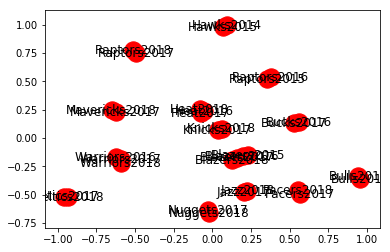

In [36]:
net.draw_networkx(g_greater_than9)

Let us try to plot these subgraphs:

In [37]:
# Splitting this island of graphs into subgraphs - as we see above these are all sub graphs with the same team over multiple seasons part of each sub-graphs
g_greater_than9_subgraphs = net.connected_component_subgraphs(g_greater_than9)

# Building a dictionary of these subgraphs
g_greater_than9_subgraphs_all = {}
i=0
for g in g_greater_than9_subgraphs:
    g_greater_than9_subgraphs_all[i] = g
    i = i + 1

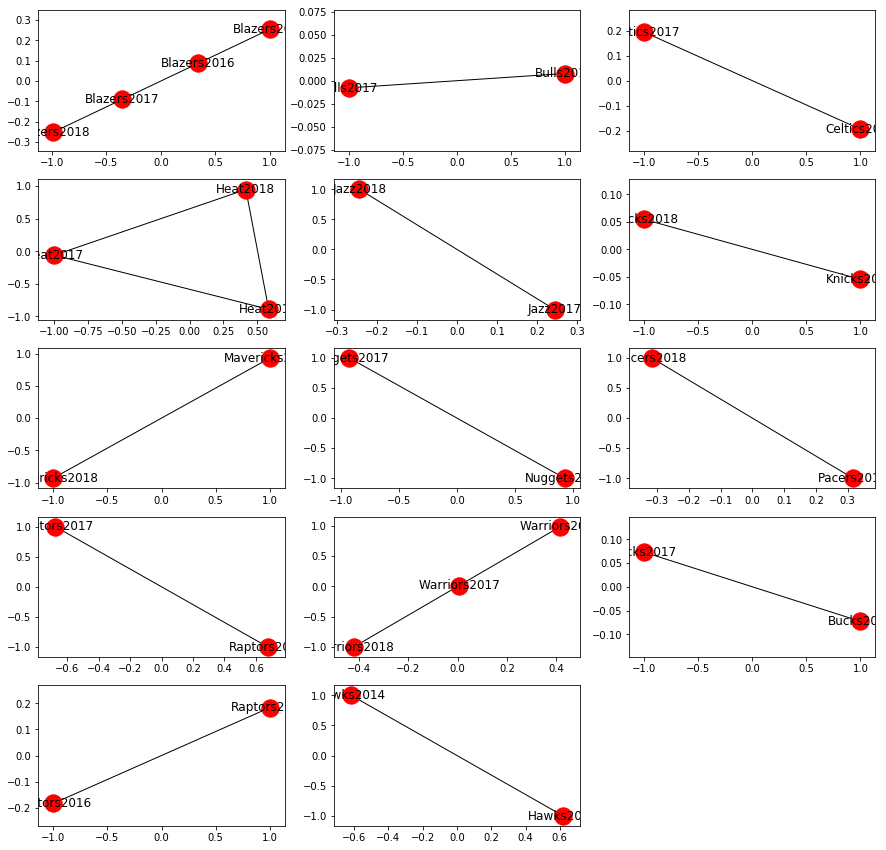

In [38]:
plt.figure(figsize=(15,15))
plt.subplot(5,3,1)
net.draw_networkx(g_greater_than9_subgraphs_all[0])

plt.subplot(5,3,2)
net.draw_networkx(g_greater_than9_subgraphs_all[1])

plt.subplot(5,3,3)
net.draw_networkx(g_greater_than9_subgraphs_all[2])

plt.subplot(5,3,4)
net.draw_networkx(g_greater_than9_subgraphs_all[3])

plt.subplot(5,3,5)
net.draw_networkx(g_greater_than9_subgraphs_all[4])

plt.subplot(5,3,6)
net.draw_networkx(g_greater_than9_subgraphs_all[5])

plt.subplot(5,3,7)
net.draw_networkx(g_greater_than9_subgraphs_all[6])

plt.subplot(5,3,8)
net.draw_networkx(g_greater_than9_subgraphs_all[7])

plt.subplot(5,3,9)
net.draw_networkx(g_greater_than9_subgraphs_all[8])

plt.subplot(5,3,10)
net.draw_networkx(g_greater_than9_subgraphs_all[9])

plt.subplot(5,3,11)
net.draw_networkx(g_greater_than9_subgraphs_all[10])

plt.subplot(5,3,12)
net.draw_networkx(g_greater_than9_subgraphs_all[11])

plt.subplot(5,3,13)
net.draw_networkx(g_greater_than9_subgraphs_all[12])

plt.subplot(5,3,14)
net.draw_networkx(g_greater_than9_subgraphs_all[13])

##### Applying the island method to get the islands based on maximum weight thresholds using iterations instead of the minimum weight thresholds used above

This is to explore how the teams combinations look like for minimum weight values.

In [39]:
def trim_edges_below(g, weight=14):
    g2=net.Graph()
    for f, t, edata in g.edges(data=True):
        if edata['weight'] < weight:
            g2.add_edge(f, t, weight=edata['weight'])
    
    return g2

In [40]:
def island_method_below(g, iterations=6):
    weights = [edata['weight'] for f, t, edata in g.edges(data=True)]
    
    mn = int(min(weights))
    mx = int(max(weights))
    
    step = int((mx-mn)/iterations)
    
    return [[threshold, trim_edges_below(g,threshold)] for threshold in range(mn,mx,step)]

In [41]:
islands_below = island_method_below(teamnet)

for i in islands_below:
    print(i[0], len(i[1]), len(list(net.connected_component_subgraphs(i[1]))))

1 0 0
3 298 1
5 298 1
7 298 1
9 298 1
11 298 1
13 298 1


In [42]:
sorted(teamnet.edges(data=True),key= lambda x: x[2]['weight'])[:20]

[('Blazers2018', 'Nuggets2014', {'weight': 1}),
 ('Blazers2018', 'Mavericks2016', {'weight': 1}),
 ('Blazers2018', 'Sixers2012', {'weight': 1}),
 ('Blazers2018', 'Magic2012', {'weight': 1}),
 ('Blazers2018', 'Pelicans2013', {'weight': 1}),
 ('Blazers2018', 'Hornets2012', {'weight': 1}),
 ('Blazers2018', 'Mavericks2014', {'weight': 1}),
 ('Blazers2018', 'Kings2015', {'weight': 1}),
 ('Blazers2018', 'Sixers2017', {'weight': 1}),
 ('Blazers2018', 'Kings2014', {'weight': 1}),
 ('Blazers2018', 'Sixers2010', {'weight': 1}),
 ('Blazers2018', 'Sixers2013', {'weight': 1}),
 ('Blazers2018', 'Sixers2011', {'weight': 1}),
 ('Blazers2018', 'Magic2014', {'weight': 1}),
 ('Blazers2018', 'Nuggets2015', {'weight': 1}),
 ('Blazers2018', 'Hornets2011', {'weight': 1}),
 ('Blazers2018', 'Celtics2015', {'weight': 1}),
 ('Blazers2018', 'Suns2014', {'weight': 1}),
 ('Blazers2018', 'Clippers2010', {'weight': 1}),
 ('Blazers2018', 'Magic2013', {'weight': 1})]

##### Now applying the island method based on the range of weights

This will help find out the teams which have common players with the count of common players within a certain range

In [43]:
def trim_edges_between(g, weight_lower=1, weight_upper=16):
    g2=net.Graph()
    for f, t, edata in g.edges(data=True):
        if edata['weight'] <= weight_upper and edata['weight'] >= weight_lower:
            g2.add_edge(f, t, weight=edata['weight'])
    
    return g2

Let us see how the teams network looks like for the weight or number of coomon players in the range 5 to 8

174 44


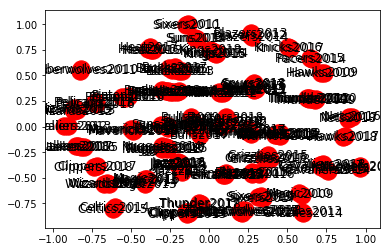

In [44]:
islands_between_5_and_8 = trim_edges_between(teamnet, 5, 8)
print(len(islands_between_5_and_8), len(list(net.connected_component_subgraphs(islands_between_5_and_8))))

net.draw_networkx(islands_between_5_and_8)

Checking in this island of network with the weight range between 5 and 8 to see if there are any 2 team / season combinations which have common players between 5 and 8 and are not the same team over mutliple seasons.
That means players who moved from one to another.

In [45]:
sets_different_between_5_8 = set()
for n in islands_between_5_and_8.nodes():
    n_team_name = n[0:n.find('20')]
    for node_neighbor in net.neighbors(islands_between_5_and_8, n):
        node_neighbor_team_name = node_neighbor[0:node_neighbor.find('20')]
        if n_team_name != node_neighbor_team_name:
            if frozenset((n, node_neighbor)) not in sets_different_between_5_8:
                print(n, node_neighbor)
                sets_different_between_5_8.add(frozenset((n, node_neighbor)))
        #print(n)

Pelicans2013 Hornets2012
Pelicans2014 Hornets2012


Again this makes sense as this was because of the relocation of the same team

Now exploring the weight values between 2 and 4:

In [46]:
islands_between_2_and_4 = trim_edges_between(teamnet, 2, 4)

print(len(islands_between_2_and_4), islands_between_2_and_4.number_of_edges(), len(list(net.connected_component_subgraphs(islands_between_2_and_4))))

288 833 3


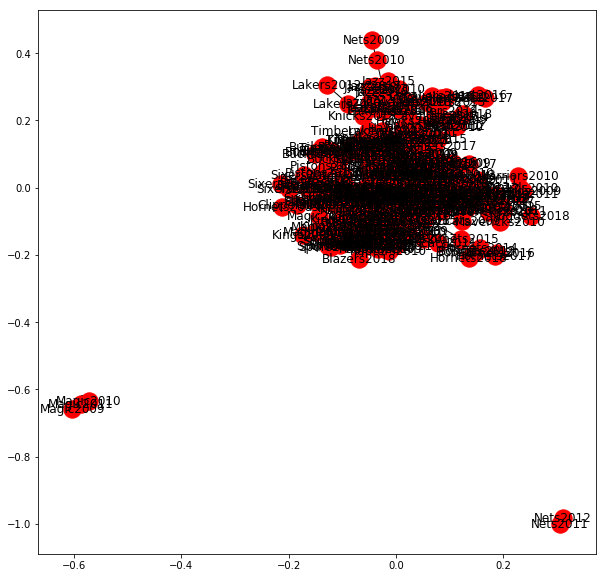

In [47]:
plt.figure(figsize=(10,10))
net.draw_networkx(islands_between_2_and_4, arrows=True)

In [48]:
i = 0
sets_different_between_2_4 = set()
for n in islands_between_2_and_4.nodes():
    n_team_name = n[0:n.find('20')]
    for node_neighbor in net.neighbors(islands_between_2_and_4, n):
        node_neighbor_team_name = node_neighbor[0:node_neighbor.find('20')]
        if n_team_name != node_neighbor_team_name:
            if frozenset((n, node_neighbor)) not in sets_different_between_2_4:
                print(n, node_neighbor)
                i = i + 1
                sets_different_between_2_4.add(frozenset((n, node_neighbor)))
        #print(n)

print(i)

Bucks2018 Hawks2017
Bucks2014 Suns2016
Bucks2014 Pistons2012
Hawks2017 Warriors2013
Bucks2013 Pistons2012
Bucks2015 Pistons2012
Bucks2012 Clippers2018
Bulls2018 Suns2017
Bulls2018 Timberwolves2016
Bulls2016 Timberwolves2018
Bulls2016 Rockets2017
Bulls2016 Timberwolves2017
Bulls2016 Knicks2015
Suns2017 Nets2018
Timberwolves2016 Bulls2017
Bulls2015 Pelicans2018
Bulls2015 Timberwolves2018
Bulls2015 Knicks2017
Bulls2015 Timberwolves2017
Bulls2015 Knicks2016
Cavaliers2018 Jazz2016
Cavaliers2018 Lakers2017
Cavaliers2018 Lakers2016
Cavaliers2018 Lakers2015
Celtics2018 Pistons2016
Celtics2018 Pistons2015
Pistons2016 Clippers2018
Pistons2016 Celtics2017
Pistons2016 Bucks2011
Pistons2016 Thunder2014
Pistons2016 Suns2013
Celtics2016 Sixers2018
Celtics2016 Cavaliers2017
Celtics2016 Rockets2017
Celtics2016 Suns2014
Celtics2015 Cavaliers2017
Pistons2015 Celtics2017
Pistons2015 Bucks2009
Pistons2015 Suns2014
Clippers2018 Bucks2011
Clippers2018 Pistons2017
Clippers2018 Wizards2017
Clippers2018 Rockets

This seems to be a big number. 

Let us explore each of these weights - 2, 3 and 4

In [49]:
islands_weight_2 = trim_edges_between(teamnet, 2, 2)

In [50]:
i = 0
graph_weight_2 = net.Graph()
sets_different_weight_2 = set()
for n in islands_weight_2.nodes():
    n_team_name = n[0:n.find('20')]
    for node_neighbor in net.neighbors(islands_weight_2, n):
        node_neighbor_team_name = node_neighbor[0:node_neighbor.find('20')]
        if n_team_name != node_neighbor_team_name:
            if frozenset((n, node_neighbor)) not in sets_different_weight_2:
                graph_weight_2.add_edge(n, node_neighbor)
                i = i + 1
                sets_different_weight_2.add(frozenset((n, node_neighbor)))
        #print(n)

print(i)

288


That means, there are 288 such different team combinations which have 2 players exchanged.

Building below just the graphs with edges between 2 different teams, having weight of 2.

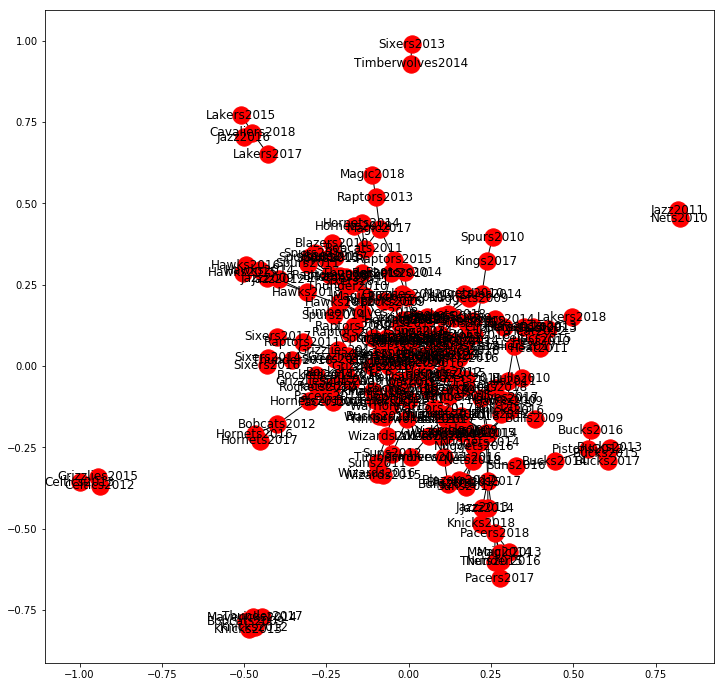

In [51]:
plt.figure(figsize=(12,12))
net.draw_networkx(graph_weight_2, arrows=True)

In [52]:
islands_weight_3 = trim_edges_between(teamnet, 3, 3)

In [53]:
i = 0
graph_weight_3 = net.Graph()
sets_different_weight_3 = set()
for n in islands_weight_3.nodes():
    n_team_name = n[0:n.find('20')]
    for node_neighbor in net.neighbors(islands_weight_3, n):
        node_neighbor_team_name = node_neighbor[0:node_neighbor.find('20')]
        if n_team_name != node_neighbor_team_name:
            if frozenset((n, node_neighbor)) not in sets_different_weight_3:
                graph_weight_3.add_edge(n, node_neighbor)
                i = i + 1
                sets_different_weight_3.add(frozenset((n, node_neighbor)))
        #print(n)

print(i)

23


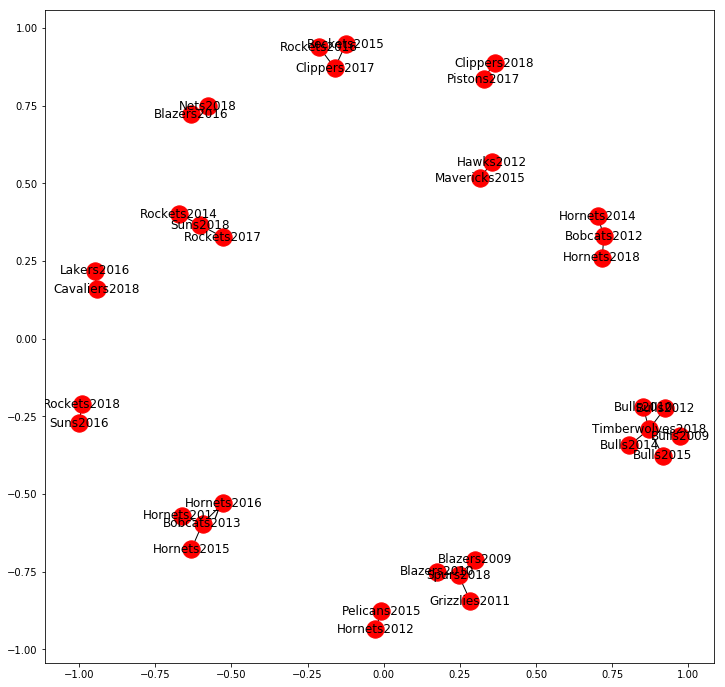

In [54]:
plt.figure(figsize=(12,12))
net.draw_networkx(graph_weight_3, arrows=True)

The above visualization gives good information of 23 such smaller graphs where 2 different team combinations have 3 common players.

In [55]:
print(list(graph_weight_3.edges()))

[('Cavaliers2018', 'Lakers2016'), ('Clippers2018', 'Pistons2017'), ('Hornets2018', 'Bobcats2012'), ('Bobcats2012', 'Hornets2014'), ('Nets2018', 'Blazers2016'), ('Rockets2018', 'Suns2016'), ('Rockets2014', 'Suns2018'), ('Suns2018', 'Rockets2017'), ('Rockets2015', 'Clippers2017'), ('Clippers2017', 'Rockets2016'), ('Spurs2018', 'Blazers2009'), ('Spurs2018', 'Blazers2010'), ('Spurs2018', 'Grizzlies2011'), ('Timberwolves2018', 'Bulls2010'), ('Timberwolves2018', 'Bulls2009'), ('Timberwolves2018', 'Bulls2012'), ('Timberwolves2018', 'Bulls2015'), ('Timberwolves2018', 'Bulls2014'), ('Hornets2017', 'Bobcats2013'), ('Bobcats2013', 'Hornets2016'), ('Bobcats2013', 'Hornets2015'), ('Pelicans2015', 'Hornets2012'), ('Mavericks2015', 'Hawks2012')]


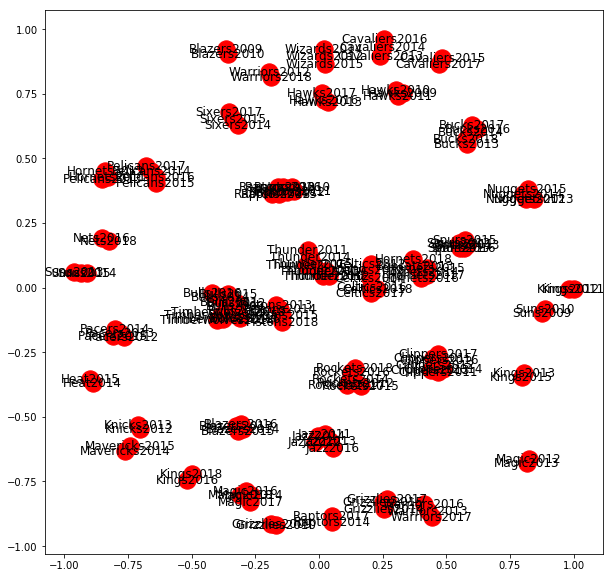

In [56]:
islands_weight_4 = trim_edges_between(teamnet, 4, 4)

plt.figure(figsize=(10,10))
net.draw_networkx(islands_weight_4, arrows=True)

In [57]:
i = 0
graph_weight_4 = net.Graph()
sets_different_weight_4 = set()
for n in islands_weight_4.nodes():
    n_team_name = n[0:n.find('20')]
    for node_neighbor in net.neighbors(islands_weight_4, n):
        node_neighbor_team_name = node_neighbor[0:node_neighbor.find('20')]
        if n_team_name != node_neighbor_team_name:
            if frozenset((n, node_neighbor)) not in sets_different_weight_4:
                graph_weight_4.add_edge(n, node_neighbor)
                i = i + 1
                sets_different_weight_4.add(frozenset((n, node_neighbor)))
        #print(n)

print(i)

5


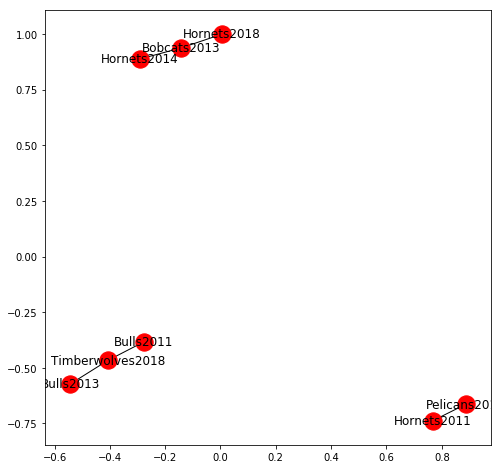

In [58]:
plt.figure(figsize=(8,8))
net.draw_networkx(graph_weight_4)

We can ignore Bobcats and Hornets combination above as both are the names of the same team.

Let us explore the connection between Bulls2011 and Timberwolves2018 first.

In [59]:
timberwolves2018_df = nba_df.loc[nba_df['team_year'] == 'Timberwolves2018']
bulls2011_df = nba_df.loc[nba_df['team_year'] == 'Bulls2011']

In [60]:
timberwolves2018_df

,team_year,player,year,team
475,Timberwolves2018,Karl-Anthony Towns,2018,Timberwolves
476,Timberwolves2018,Jimmy Butler,2018,Timberwolves
477,Timberwolves2018,Andrew Wiggins,2018,Timberwolves
478,Timberwolves2018,Derrick Rose,2018,Timberwolves
479,Timberwolves2018,Jeff Teague,2018,Timberwolves
480,Timberwolves2018,Taj Gibson,2018,Timberwolves
481,Timberwolves2018,Josh Okogie,2018,Timberwolves
482,Timberwolves2018,Luol Deng,2018,Timberwolves
483,Timberwolves2018,Tyus Jones,2018,Timberwolves
484,Timberwolves2018,Gorgui Dieng,2018,Timberwolves


In [61]:
bulls2011_df

,team_year,player,year,team
2135,Bulls2011,Derrick Rose,2011,Bulls
2136,Bulls2011,Luol Deng,2011,Bulls
2137,Bulls2011,Joakim Noah,2011,Bulls
2138,Bulls2011,Kyle Korver,2011,Bulls
2139,Bulls2011,Taj Gibson,2011,Bulls
2140,Bulls2011,Jimmy Butler,2011,Bulls


As these 2 are altogether different teams, let's see who are the common 4 players between these 2:

In [62]:
bulls2011_df[bulls2011_df.player.isin(timberwolves2018_df.player)]

,team_year,player,year,team
2135,Bulls2011,Derrick Rose,2011,Bulls
2136,Bulls2011,Luol Deng,2011,Bulls
2139,Bulls2011,Taj Gibson,2011,Bulls
2140,Bulls2011,Jimmy Butler,2011,Bulls


As wee see above, Derrick Rose, Luol Deng, Taj Gibson and Jimmy Butler played for Bulls in 2011, but all of them played later for Timberwolves in 2018.

In [63]:
bulls2013_df = nba_df.loc[nba_df['team_year'] == 'Bulls2013']

In [64]:
bulls2013_df[bulls2013_df.player.isin(timberwolves2018_df.player)]

,team_year,player,year,team
1777,Bulls2013,Luol Deng,2013,Bulls
1778,Bulls2013,Derrick Rose,2013,Bulls
1779,Bulls2013,Jimmy Butler,2013,Bulls
1780,Bulls2013,Taj Gibson,2013,Bulls


We see the same 4 players common between - Bulls 2013 and Timberwolves 2018. That means all of these 4 played for Bulls in 2013 too.

Again, we won't consider here Hornets and Pelicans for this analysis, as both are the same teams.

Let is expand this weigh check to 5 - to see if there are any 2 teams ombinations where 5 players from a team moved to another team

In [65]:
islands_weight_5 = trim_edges_between(teamnet, 5, 5)

In [66]:
i = 0
graph_weight_5 = net.Graph()
sets_different_weight_5 = set()
for n in islands_weight_5.nodes():
    n_team_name = n[0:n.find('20')]
    for node_neighbor in net.neighbors(islands_weight_5, n):
        node_neighbor_team_name = node_neighbor[0:node_neighbor.find('20')]
        if n_team_name != node_neighbor_team_name:
            if frozenset((n, node_neighbor)) not in sets_different_weight_5:
                graph_weight_5.add_edge(n, node_neighbor)
                i = i + 1
                sets_different_weight_5.add(frozenset((n, node_neighbor)))
        #print(n)

print(i)

1


In [67]:
sets_different_weight_5

{frozenset({'Hornets2012', 'Pelicans2014'})}

The above is not a valid 2 teams combination as both these are the names of the same team.

Hence we figure out that the biggest movement of players from 1 team to another - like a group - happened between Bulls and Timberwolves, and this was for 4 players - Derrick Rose, Luol Deng, Taj Gibson and Jimmy Butler.

### Part 6: Conculsions / Findings:

From the above code there are some valuable insights about the NBA network:

1. First, the most connected player in the league based on all 2 types of centrality is Anthony Tolliver. Followed closely after him are Jeremy Lin and Michael Beasley.

2. Then, of the current NBA All Stars, the two all stars that have played with the most all stars are Kevin Durant and Russell Westbrook.

3. The biggest movement of players happened between Bulls and Timerwolves which was 4 in number, and the players were : Derrick Rose, Luol Deng, Taj Gibson and Jimmy Butler.

4. There were 23 sombinations where 3 players moved from one team/season combination to another team/season combination where the teams were actually 2 different teams. We did not explore the same team rebranding / relocation combination here.